Below Jupyter notebook mentions all the steps followed to create the datasets for our demo.
 
You can find all datasets in the /datasets folder. Following are the steps used to create all the above datasets -

In [1]:
import pandas as pd
from random import *
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
final_abt = pd.read_excel(r'C:\Users\sinnsr\OneDrive - SAS\Projects and POCs\CC Hyper Personalization\datasets\Final_ABT1.xlsx')

In [3]:
final_abt.columns

Index(['acceptTermOffer', 'age', 'campaign_ID', 'car', 'car_loan', 'custID',
       'default', 'education', 'job', 'lastcon_daysago', 'lastcon_secs',
       'marital', 'mortgage', 'own_home', 'pref_channel', 'tenure_yrs',
       'num_active_products', 'tot_spend', 'job_gp'],
      dtype='object')

In [4]:
length = len(final_abt)

In [5]:
length

10281

#### Generate Mobile Numbers

In [6]:
from faker import Faker
fake = Faker('hi_IN')

In [7]:
from faker.providers import phone_number

In [8]:
 fake.phone_number()

'05214 964309'

In [9]:
 mobile_number = []

In [10]:
for _ in range(length):
    i = fake.phone_number()
    mobile_number.append(i)

In [11]:
final_abt['mobile_number'] = mobile_number

In [12]:
final_abt

,acceptTermOffer,age,campaign_ID,car,car_loan,custID,default,education,job,lastcon_daysago,lastcon_secs,marital,mortgage,own_home,pref_channel,tenure_yrs,num_active_products,tot_spend,job_gp,mobile_number
0,yes,98,2,no,0,59800,yes,basic.4y,retired,52,272,married,310000,yes,email,>9,3,22844,Low Earner,+91 004 3212979
1,no,92,1,no,0,60039,no,unknown,retired,12,271,married,500000,yes,mobile,>9,3,21886,Low Earner,028-02985275
2,no,94,1,no,0,59896,no,basic.9y,retired,8,134,married,0,no,email,>9,1,21795,Low Earner,00870 613715
3,yes,92,1,yes,50000,60173,no,unknown,retired,12,370,married,0,no,email,>9,4,21771,Low Earner,00721 975351
4,no,95,1,no,0,58055,no,basic.6y,retired,9,85,divorced,0,no,email,>9,3,21525,Low Earner,04231903732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10276,yes,18,2,yes,46000,59833,no,basic.6y,student,18,368,single,0,no,mobile,0-3,2,-1467,Medium Earner,+91 523 9222347
10277,no,17,2,no,0,59591,no,basic.9y,student,8,182,single,350000,yes,email,0-3,2,-1538,Medium Earner,+91 316 4035368
10278,yes,18,2,no,0,57412,no,high.school,student,10,256,single,0,no,mobile,0-3,1,-1891,Medium Earner,+91 861 8472326
10279,yes,17,1,yes,44000,59773,no,unknown,student,6,896,single,0,no,email,0-3,5,-1891,Medium Earner,09397435474


In [13]:
length = len(final_abt)

In [14]:
length

10281

In [15]:
final_abt['job'].unique()

array(['retired', 'housemaid', 'unknown', 'blue-collar', 'management',
       'admin.', 'self-employed', 'technician', 'entrepreneur',
       'unemployed', 'services', 'student'], dtype=object)

In [63]:
final_abt.groupby('job_gp').count()

,acceptTermOffer,age,campaign_ID,car,car_loan,custID,default,education,job,lastcon_daysago,lastcon_secs,marital,mortgage,own_home,pref_channel,tenure_yrs,num_active_products,tot_spend,mobile_number
job_gp,,,,,,,,,,,,,,,,,,,
High Earner,6121,6121,6121,6121,6121,6121,6121,6121,6121,6121,6121,6121,6121,6121,6121,6121,6121,6121,6121
Low Earner,2177,2177,2177,2177,2177,2177,2177,2177,2177,2177,2177,2177,2177,2177,2177,2177,2177,2177,2177
Medium Earner,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983,1983


In [15]:
neg_t = final_abt[final_abt['tot_spend'] < 0]

In [16]:
len(neg_t)

88

In [16]:
high_spend_merchants = ['Shoppersstop', 'Marks and Spencer', 'LG', 'Taj Hotels'] # 3000-5000 , #10000 

In [17]:
medium_spend_merchants = ['Punjabibynature','DMART', 'BigBazaar', 'PVR', 'Starbucks' ] # 1000 - 3000

In [18]:
low_spend_merchants = ['bookmyshow','dominos','airtel', 'Naturals']      #200 - 600

In [19]:
low_medium_spends = low_spend_merchants + medium_spend_merchants

In [20]:
medium_high_merchants = medium_spend_merchants + high_spend_merchants

In [29]:
column_names = ["custID", "merchant", "amount","transaction_date","transaction_unit","job"]

In [30]:
trans_table = pd.DataFrame(columns= column_names)

In [31]:
trans_table

,custID,merchant,amount,transaction_date,transaction_unit,job


In [32]:
randint(2,7)

4

In [33]:
random.choice(high_spend_merchants)

'Taj Hotels'

#### Randomly create number of transactions for each customer

In [34]:
number_of_transactions = 0
cust_Id_list = []
transaction_unit = []
transaction_amount = []
merchant_type = []
job_list = []

In [35]:
for i in range(length):
    customerid = final_abt['custID'][i]
    job = final_abt['job'][i]
    number_of_transactions = randint(12,24)
    #print(customerid)
    for _ in range(number_of_transactions):
        
        cust_Id_list.append(customerid)
        transaction_unit.append(1)
        job_list.append(job)
        
        if job in ['retired', 'unemployed', 'unknown', 'housemaid']:
            ch = random.choice(low_spend_merchants)
            merchant_type.append(ch)
            amt = randint(200,600)
            transaction_amount.append(amt)
            
        elif job in ['student','self-employed','services','technician']:
            ch = random.choice(low_medium_spends)
            merchant_type.append(ch)
            amt = randint(400,1800)
            transaction_amount.append(amt)
        
        elif job in ['blue-collar', 'management', 'admin.','entrepreneur']:
            
            ch = random.choice(medium_high_merchants)
            merchant_type.append(ch)
            amt = randint(2000,8000)
            transaction_amount.append(amt)
            
        else:
            merchant_type.append(0)
            transaction_amount.append(0)      
    

In [36]:
len(merchant_type)

185160

In [37]:
trans_table['merchant'] = merchant_type

In [38]:
trans_table['amount'] = transaction_amount

In [39]:
trans_table['transaction_unit'] = transaction_unit

In [40]:
trans_table['custID'] = cust_Id_list

In [41]:
trans_table['job'] = job_list

In [42]:
trans_table.iloc[65]

custID                60173
merchant             airtel
amount                  301
transaction_date        NaN
transaction_unit          1
job                 retired
Name: 65, dtype: object

In [43]:
mer_types = trans_table.groupby('merchant')['transaction_unit'].sum()

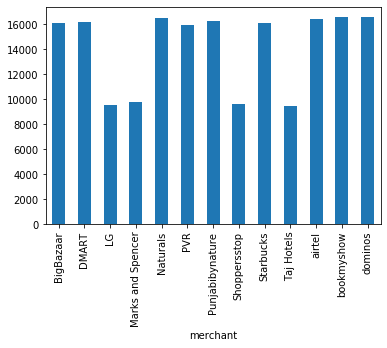

In [44]:
mer_types.plot.bar()

#### Make room for cross-spends as well which are not encountered - 10% of the housewives in the data will shop from Shoppers stop or Marks&S

In [45]:
trans_table[trans_table['job'] == 'housemaid']

,custID,merchant,amount,transaction_date,transaction_unit,job
245,60012,Naturals,555,NaN,1,housemaid
246,60012,bookmyshow,423,NaN,1,housemaid
247,60012,Naturals,435,NaN,1,housemaid
248,60012,bookmyshow,313,NaN,1,housemaid
249,60012,dominos,498,NaN,1,housemaid
...,...,...,...,...,...,...
182129,52944,dominos,422,NaN,1,housemaid
182130,52944,airtel,215,NaN,1,housemaid
182131,52944,Naturals,326,NaN,1,housemaid
182132,52944,bookmyshow,499,NaN,1,housemaid


In [46]:
housewife = trans_table.loc[trans_table['job'] == 'housemaid']

In [47]:
house_types = housewife.groupby('merchant')['transaction_unit'].sum()

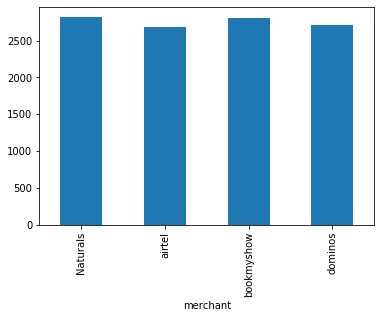

In [48]:
house_types.plot.bar()

In [49]:
print(int(0.1*3045))
print(3045/int(0.1*3045))

304
10.016447368421053


In [50]:
b = housewife[np.mod(np.arange(housewife.index.size),10)==0]

In [51]:
random.choice(['Shoppersstop', 'Marks and Spencer'])

'Marks and Spencer'

In [52]:
list_mer = []


In [53]:
amount_mer = []

In [54]:
b["merchant"] = ""

C:\Users\sinnsr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
len(b)

1102

In [56]:
for i in range(len(b)):
    list_mer.append(random.choice(['Shoppersstop', 'Marks and Spencer','DMART','BigBazaar']))
    amount_mer.append(randint(2500,4500))

In [57]:
len(list_mer)

1102

In [58]:
b['merchant'] = list_mer

C:\Users\sinnsr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
b['amount'] = amount_mer

C:\Users\sinnsr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


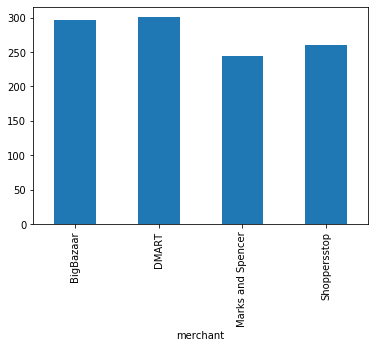

In [60]:
b.groupby('merchant')['transaction_unit'].sum().plot.bar()

In [61]:
b

,custID,merchant,amount,transaction_date,transaction_unit,job
245,60012,DMART,3747,NaN,1,housemaid
255,60012,Shoppersstop,3344,NaN,1,housemaid
265,60012,Marks and Spencer,3689,NaN,1,housemaid
643,59998,BigBazaar,2521,NaN,1,housemaid
866,60013,BigBazaar,3574,NaN,1,housemaid
...,...,...,...,...,...,...
181389,55378,Marks and Spencer,3726,NaN,1,housemaid
181399,55378,DMART,3914,NaN,1,housemaid
182051,54294,DMART,4488,NaN,1,housemaid
182115,52944,BigBazaar,4314,NaN,1,housemaid


In [66]:
a = b.groupby('custID')['transaction_unit'].sum()

In [67]:
a = a.to_list()

#### Checking whether the same custID is overwritten

In [68]:
sum(i > 1 for i in a)

450

In [69]:
testtranstable = trans_table

In [70]:
testtranstable.update(b)

In [71]:
testtranstable

,custID,merchant,amount,transaction_date,transaction_unit,job
0,59800.0,bookmyshow,249.0,NaN,1.0,retired
1,59800.0,airtel,515.0,NaN,1.0,retired
2,59800.0,dominos,577.0,NaN,1.0,retired
3,59800.0,dominos,355.0,NaN,1.0,retired
4,59800.0,bookmyshow,400.0,NaN,1.0,retired
...,...,...,...,...,...,...
185155,59604.0,airtel,1675.0,NaN,1.0,student
185156,59604.0,dominos,1347.0,NaN,1.0,student
185157,59604.0,Punjabibynature,1757.0,NaN,1.0,student
185158,59604.0,dominos,1798.0,NaN,1.0,student


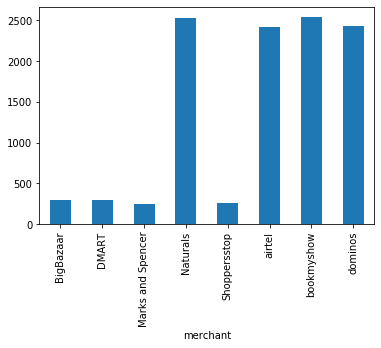

In [72]:
housewife_t = testtranstable.loc[testtranstable['job'] == 'housemaid']

house_types_t = housewife_t.groupby('merchant')['transaction_unit'].sum()

house_types_t.plot.bar()

In [73]:
testtranstable['custID'] = testtranstable['custID'].astype(int)

In [74]:
testtranstable[testtranstable['custID'] == 59800]

,custID,merchant,amount,transaction_date,transaction_unit,job
0,59800,bookmyshow,249.0,NaN,1.0,retired
1,59800,airtel,515.0,NaN,1.0,retired
2,59800,dominos,577.0,NaN,1.0,retired
3,59800,dominos,355.0,NaN,1.0,retired
4,59800,bookmyshow,400.0,NaN,1.0,retired
5,59800,dominos,451.0,NaN,1.0,retired
6,59800,bookmyshow,561.0,NaN,1.0,retired
7,59800,Naturals,551.0,NaN,1.0,retired
8,59800,Naturals,525.0,NaN,1.0,retired
9,59800,bookmyshow,391.0,NaN,1.0,retired


In [75]:
aggregate_table = testtranstable.groupby('custID', as_index=False)[['amount']].sum()

In [76]:
aggregate_table

,custID,amount
0,50001,8058.0
1,50002,15598.0
2,50003,16111.0
3,50004,70025.0
4,50005,17447.0
...,...,...
10276,60277,11869.0
10277,60278,14747.0
10278,60279,12331.0
10279,60280,6496.0


In [77]:
testtranstable

,custID,merchant,amount,transaction_date,transaction_unit,job
0,59800,bookmyshow,249.0,NaN,1.0,retired
1,59800,airtel,515.0,NaN,1.0,retired
2,59800,dominos,577.0,NaN,1.0,retired
3,59800,dominos,355.0,NaN,1.0,retired
4,59800,bookmyshow,400.0,NaN,1.0,retired
...,...,...,...,...,...,...
185155,59604,airtel,1675.0,NaN,1.0,student
185156,59604,dominos,1347.0,NaN,1.0,student
185157,59604,Punjabibynature,1757.0,NaN,1.0,student
185158,59604,dominos,1798.0,NaN,1.0,student


#### Randomly populate transaction dates

In [78]:
import datetime

In [79]:
start_date = datetime.date(2020, 2, 1) #1st Feb 2020
end_date = datetime.date(2020, 4, 1) #1st Apr 2020

time_between_dates = end_date - start_date
days_between_dates = time_between_dates.days

In [80]:
list_of_dates = []

In [81]:
for i in range(len(testtranstable)):
    
    random_number_of_days = random.randrange(days_between_dates)
    random_date = start_date + datetime.timedelta(days=random_number_of_days)
    
    list_of_dates.append(random_date)
    
    

In [82]:
testtranstable['transaction_date'] = list_of_dates

In [83]:
testtranstable.to_csv('transaction_table.csv',index=False)

#### Join the tables

In [84]:
final_abt_join = pd.merge(final_abt,aggregate_table,on='custID')

#### Export the data to csv

In [85]:
final_abt_join.to_csv('final_customer_abt.csv',index=False)

#### Change job_gp for technician to Medium Earner

In [86]:
len(cust_Id_list)

185160

In [87]:
len(transaction_unit)

185160

In [88]:
type(cust_Id_list)

list

In [89]:
trans_table['custID'] = cust_Id_list

In [90]:
trans_table['transaction_unit'] = transaction_unit

In [91]:
trans_table.groupby('custID')['transaction_unit'].sum()

custID
50001    13
50002    17
50003    13
50004    14
50005    18
         ..
60277    12
60278    15
60279    16
60280    16
60281    20
Name: transaction_unit, Length: 10281, dtype: int64